# Imports

In [ ]:
!pip install --upgrade pyalgotrading


In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "39394ea25014909e2c45b4210fe78d77f5440470"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [5]:
! wget -O volatility_trend_atr.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/volatility_trend_atr/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' volatility_trend_atr.py

--2024-01-14 12:14:07--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/volatility_trend_atr/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3298 (3.2K) [text/plain]
Saving to: ‘volatility_trend_atr.py’

volatility_trend_at 100%[===================>]   3.22K  --.-KB/s    in 0s      

2024-01-14 12:14:07 (50.6 MB/s) - ‘volatility_trend_atr.py’ saved [3298/3298]



In [6]:
from volatility_trend_atr import VolatilityTrendATR as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 139782,
 'strategyId': '76d2bdd9b31f4f95bfd76443a136f29d'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('TATAPOWER', exchange='NSE')
instrument

[{'id': 453, 'value': 'NSE:TATAPOWER'},
 {'id': 1679080, 'value': 'NSE:TATAPOWER.AF'},
 {'id': 1675518, 'value': 'NSE:TATAPOWER.BL'},
 {'id': 1676317, 'value': 'NSE:TATAPOWER.RL'},
 {'id': 40654, 'value': 'NSE:TATAPOWER20DEC38CE'},
 {'id': 40655, 'value': 'NSE:TATAPOWER20DEC38PE'},
 {'id': 40656, 'value': 'NSE:TATAPOWER20DEC39CE'},
 {'id': 40657, 'value': 'NSE:TATAPOWER20DEC39PE'},
 {'id': 40658, 'value': 'NSE:TATAPOWER20DEC40CE'},
 {'id': 40659, 'value': 'NSE:TATAPOWER20DEC40PE'}]

## Setup Parameters

In [10]:
parameters = {
  'ATR_PREV_CANDLES_NUM':70,
   'TIMEPERIOD_ATR': 20
}

In [11]:
initial_virtual_funds = 1000000000     # in Rupees

## Backtesting

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2022-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:TATAPOWER', 
    lots=2,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Volatility Trend ATR' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════════════════╕
│ Config                  │ Value                                              │
╞═════════════════════════╪════════════════════════════════════════════════════╡
│ Strategy Name           │ Volatility Trend ATR                               │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                        │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:TATAPOWER']                                  │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 2                                                  │
├─────────────────────────┼────────────────────────────────────────────────────┤
│ Start Timestamp         │ 2022-08-01 0

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (9)

Execution Progress:   0%|          | 0/31472100.0 [00:00<?]

In [15]:
print(logs)

[2024-01-14 12:15:08] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-01-14 12:15:08] Sanity checks on cfg successful.
[2024-01-14 12:15:08] Currency set to "INR"
[2024-01-14 12:15:08] Setting up broker connection...
[2024-01-14 12:15:11] Broker connection has been setup successfully.
[2024-01-14 12:15:11] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '1000000000.00'
[2024-01-14 12:15:11] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-01-14 12:15:11] Welcome ALGOBULLS VIRTUAL USER!
[2024-01-14 12:15:11] Reading strategy...
[2024-01-14 12:15:11] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2022-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2022-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


### Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,TATAPOWER,2022-08-03 15:15:00+05:30,BUY,2,₹,232.60,,2022-08-03 15:30:00+05:30,SELL,2,₹,232.60,,0.0,0.0,0,0.0
1,NSE,TATAPOWER,2022-08-04 09:15:00+05:30,BUY,2,₹,233.80,,2022-08-04 15:30:00+05:30,SELL,2,₹,227.90,,-11.8,-11.8,0,-11.8
2,NSE,TATAPOWER,2022-08-05 09:15:00+05:30,BUY,2,₹,228.65,,2022-08-05 15:30:00+05:30,SELL,2,₹,232.15,,7.0,-4.8,0,7.0
3,NSE,TATAPOWER,2022-08-08 09:15:00+05:30,BUY,2,₹,232.05,,2022-08-08 15:30:00+05:30,SELL,2,₹,228.20,,-7.7,-12.5,0,-7.7
4,NSE,TATAPOWER,2022-08-10 09:15:00+05:30,BUY,2,₹,229.50,,2022-08-10 15:30:00+05:30,SELL,2,₹,228.60,,-1.8,-14.3,0,-1.8
5,NSE,TATAPOWER,2022-08-11 09:15:00+05:30,SELL,2,₹,229.90,,2022-08-11 15:30:00+05:30,BUY,2,₹,229.30,,1.2,-13.1,0,1.2
6,NSE,TATAPOWER,2022-08-12 09:15:00+05:30,SELL,2,₹,230.00,,2022-08-12 15:30:00+05:30,BUY,2,₹,232.25,,-4.5,-17.6,0,-4.5
7,NSE,TATAPOWER,2022-08-16 09:15:00+05:30,SELL,2,₹,233.65,,2022-08-16 15:30:00+05:30,BUY,2,₹,236.35,,-5.4,-23.0,0,-5.4
8,NSE,TATAPOWER,2022-08-17 09:15:00+05:30,SELL,2,₹,238.45,,2022-08-17 15:30:00+05:30,BUY,2,₹,237.45,,2.0,-21.0,0,2.0
9,NSE,TATAPOWER,2022-08-18 09:15:00+05:30,SELL,2,₹,236.95,,2022-08-18 15:30:00+05:30,BUY,2,₹,238.00,,-2.1,-23.1,0,-2.1


### Statistics Reports

#### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-08-03
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      93.0%

Cumulative Return   -0.0%
CAGR﹪              -0.0%

Sharpe              -0.6
Prob. Sharpe Ratio  25.15%
Sortino             -0.76
Sortino/√2          -0.54
Omega               0.89

Max Drawdown        -0.0%
Longest DD Days     361

Gain/Pain Ratio     -0.12
Gain/Pain (1M)      -0.35

Payoff Ratio        0.76
Profit Factor       0.89
Common Sense Ratio  0.81
CPC Index           0.37
Tail Ratio          0.91
Outlier Win Ratio   3.68
Outlier Loss Ratio  4.12

MTD                 -0.0%
3M                  -0.0%
6M                  0.0%
YTD                 0.0%
1Y                  -0.0%
3Y (ann.)           -0.0%
5Y (ann.)           -0.0%
10Y (ann.)          -0.0%
All-time (ann.)     -0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  361
Recovery Factor     -0.53
Ulcer Index         0.0
Serenity Index      -0.05


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-08-03
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             93.0%

Cumulative Return          -0.0%
CAGR﹪                     -0.0%

Sharpe                     -0.6
Prob. Sharpe Ratio         25.15%
Smart Sharpe               -0.56
Sortino                    -0.76
Smart Sortino              -0.72
Sortino/√2                 -0.54
Smart Sortino/√2           -0.51
Omega                      0.89

Max Drawdown               -0.0%
Longest DD Days            361
Volatility (ann.)          0.0%
Calmar                     -0.54
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           -0.0%
Expected Monthly %         -0.0%
Expected Yearly %          -0.0%
Kelly Criterion            -6.37%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       8
M

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-08-04,2022-12-23,2023-07-31,361,-0.000012,-0.000011


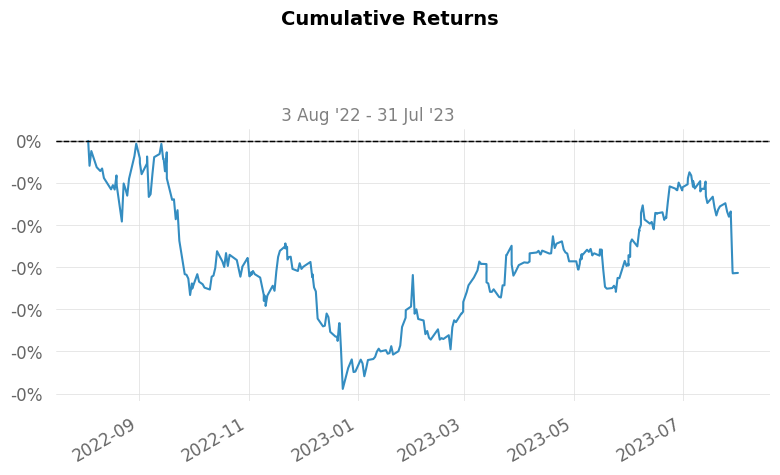

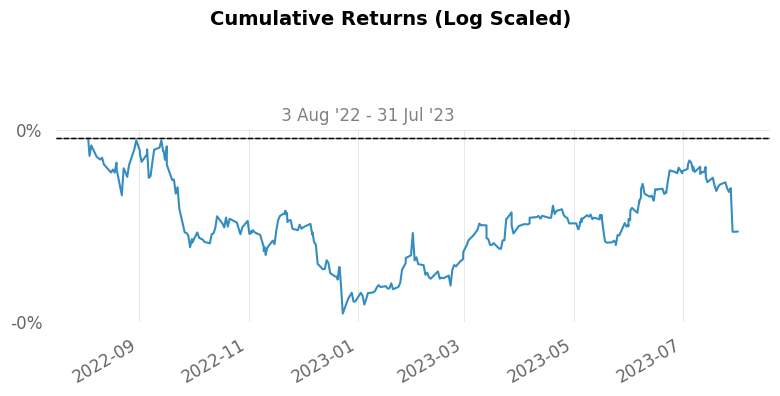

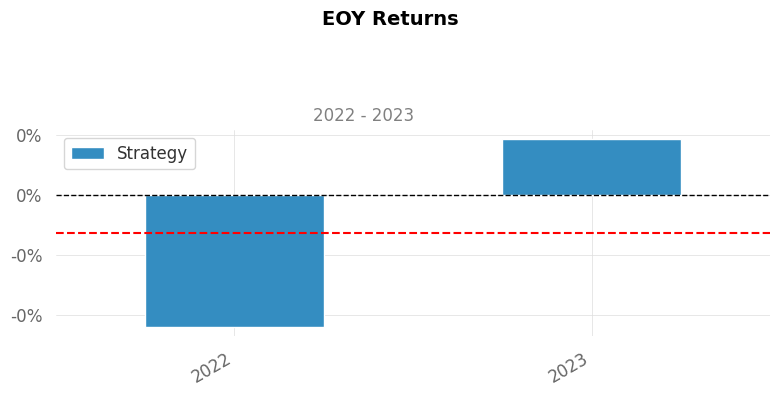

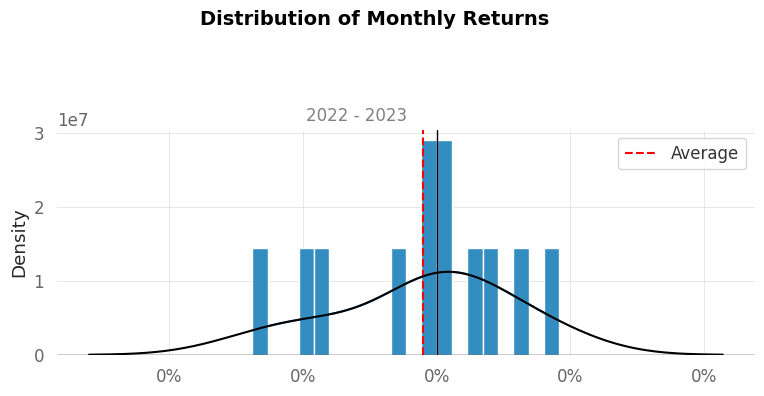

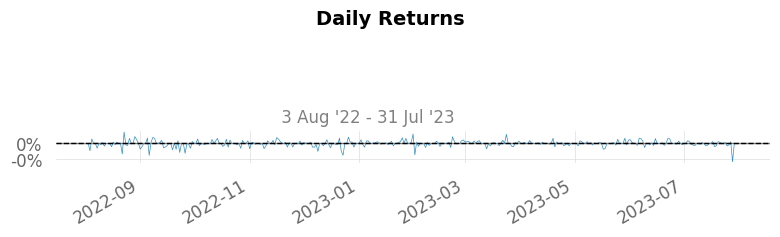

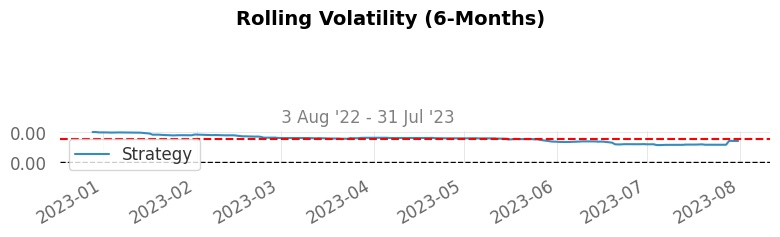

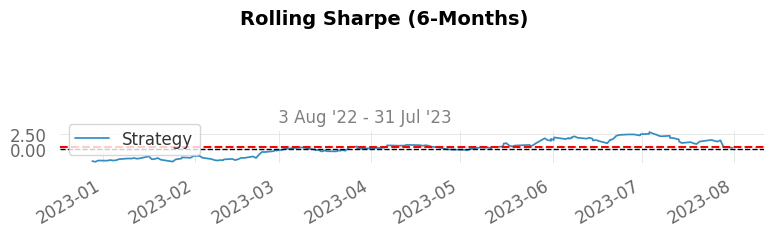

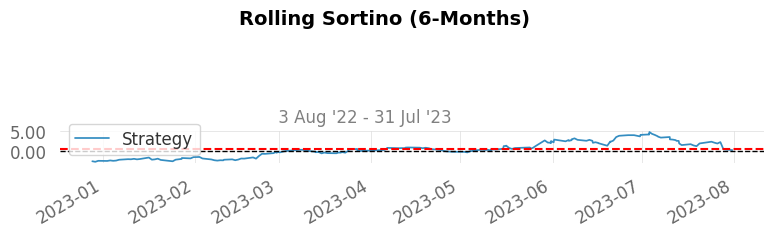

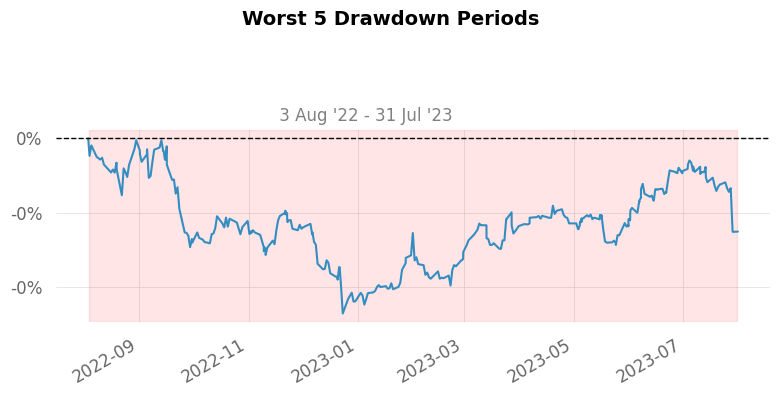

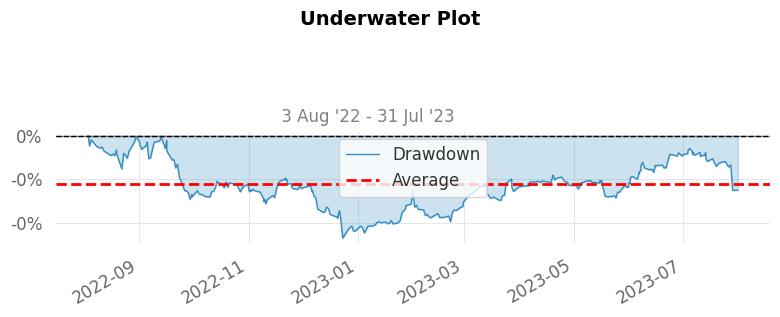

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


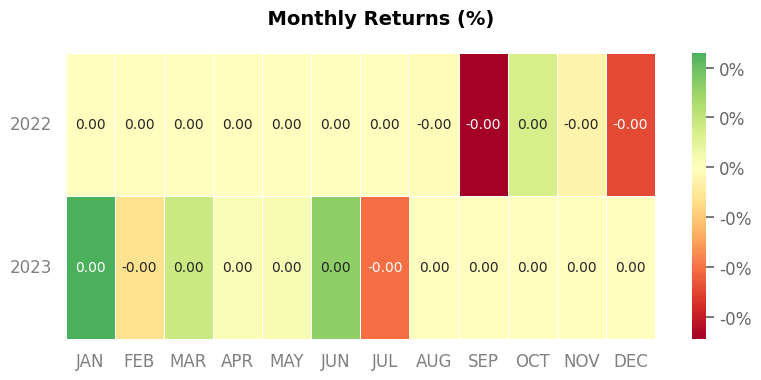

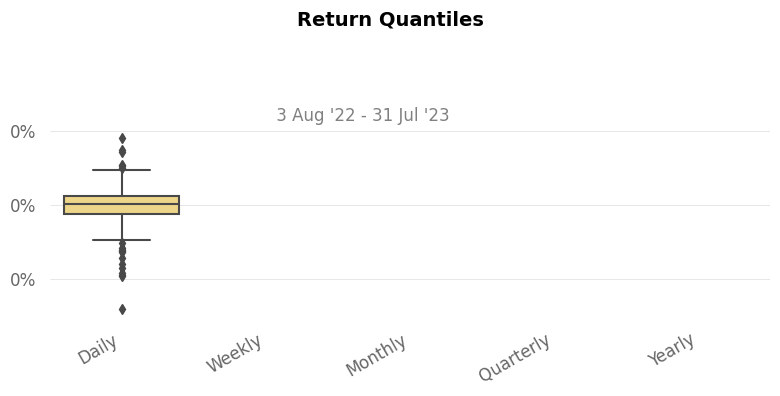

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True )

### Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 2ca5979173d943ce972029adf3488469 |
| Transaction Type | SELL                             |
| Instrument       | NSE:TATAPOWER                    |
| Quantity         | 2                                |
| Price            | ₹236.65                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-01-14T06:46:10.989695Z | COMPLETE               |
| 2024-01-14T06:46:10.989678Z | OPEN                   |
| 2024-01-14T06:46:10.989659Z | OPEN PENDING           |
| 2024-01-14T06:46:10.989639Z | VALIDATION PENDING     |
| 2024-01-14T06:46:10.989593Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | a681bb3e7ee7446f9

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:ADANIPOWER', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---